# 多种机器学习模型对量子点发光材料色温的预测

## 1. 依赖注入

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.neural_network import MLPRegressor
import matplotlib.pylab as plt
import matplotlib.transforms as mtransforms
import matplotlib.lines as mlines
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

## 2. 数据处理

In [2]:
# 读取数据
train_dev_set = read_csv('./ELCIE_traindev.csv',dtype=np.float32)
test_set = read_csv('./ELCIE_test.csv',dtype=np.float32)

# 原始数据
train_dev_data_orig = train_dev_set.values
test_data_orig = test_set.values

# 填充缺失值(默认使用平均值填充)
imputation = SimpleImputer()
train_dev_data_impute = imputation.fit_transform(train_dev_data_orig)
test_data_impute = imputation.fit_transform(test_data_orig)

# 标准化
scaler = StandardScaler().fit(train_dev_data_impute[:,1:])
train_dev_X = scaler.transform(train_dev_data_impute[:,1:])
train_dev_y = train_dev_data_impute[:,0]
test_X = scaler.transform(test_data_impute[:,1:])
test_y = test_data_impute[:,0]

## 3. 实例化模型

In [3]:
# 1. MLP
model_mlp = MLPRegressor(hidden_layer_sizes=(6, ),
                         activation='relu',
                         solver='lbfgs',
                         alpha=10**2,
                         batch_size='auto',
                         learning_rate='invscaling',
                         learning_rate_init=0.011231871,
                         power_t=0.5,
                         max_iter=1000,
                         shuffle=True,
                         random_state=0,
                         tol=0.01,
                         verbose=False,
                         warm_start=False,
                         momentum=0.9,
                         nesterovs_momentum=True,
                         early_stopping=False,
                         beta_1=0.9,
                         beta_2=0.999,
                         epsilon=1e-08)

In [4]:
# 2. xgboost
model_xgb = xgb.XGBRegressor(base_score=0.5, 
                             booster='gbtree',
                             colsample_bylevel=1,
                             colsample_bynode=1,
                             colsample_bytree=1,
                             enable_categorical=False,
                             gamma=0,
                             learning_rate=0.300000012,
                             max_delta_step=0,
                             max_depth=6,
                             min_child_weight=1,
                             n_estimators=100,
                             num_parallel_tree=1, 
                             predictor='auto',
                             random_state=0,
                             reg_alpha=0,
                             reg_lambda=1,
                             scale_pos_weight=1,
                             subsample=1,
                             tree_method='hist',
                             validate_parameters=1)

In [8]:
# 3. GBDT
model_gbdt = GradientBoostingRegressor(alpha=0.9,
                          ccp_alpha=0.0,
                          criterion='friedman_mse',
                          init=None,
                          learning_rate=0.1,
                          loss='ls',
                          max_depth=3,
                          max_features=None,
                          max_leaf_nodes=None,
                          min_impurity_decrease=0.0,
                        #   min_impurity_split=None,
                          min_samples_leaf=1,
                          min_samples_split=2,
                          min_weight_fraction_leaf=0.0,
                          n_estimators=100,
                          n_iter_no_change=None,
                        #   presort='deprecated',
                          random_state=201,
                          subsample=1.0,
                          tol=0.0001,
                          validation_fraction=0.1,
                          verbose=0,
                          warm_start=False
                          )

## 4. 模型训练

In [9]:
model_mlp.fit(train_dev_X, train_dev_y)
model_gbdt.fit(train_dev_X, train_dev_y)
model_xgb.fit(train_dev_X, train_dev_y)

c:\ProgramData\Miniconda3\lib\site-packages\sklearn\ensemble\_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='hist',
             validate_parameters=1, verbosity=None)

## 5. 预测

In [12]:
# 选择模型
model = model_mlp
# model = model_gbdt
# model = model_rf
# model = model_xgb

# 预测结果
pre_train = model.predict(train_dev_X)
pre_test = model.predict(test_X)

# 计算mae
mae_train = abs(pre_train - train_dev_y).mean()
mae_test = abs(pre_test - test_y).mean()

# 计算rmse
rmse_train = np.sqrt(mean_squared_error(train_dev_y, pre_train))
rmse_test = np.sqrt(mean_squared_error(test_y, pre_test))

# 计算R squred
r2_score_train = r2_score(train_dev_y, pre_train)
r2_score_test = r2_score(test_y, pre_test)

print('mae_train:',mae_train)
print('mae_test:',mae_test)
print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)
print('r2_score_train:',r2_score_train)
print('r2_score_test:',r2_score_test)

mae_train: 69.07843288596466
mae_test: 98.81227782850458
rmse_train: 165.7308723150209
rmse_test: 215.01699162405987
r2_score_train: 0.9896002623540485
r2_score_test: 0.9903036991467322


## 6. 可视化

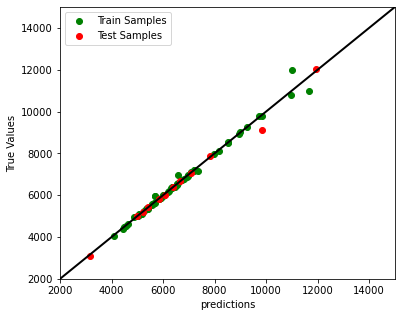

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.axis([2000, 15000, 2000, 15000])
ax.scatter(pre_train, train_dev_y, color="green", label="Train Samples")
ax.scatter(pre_test, test_y, color="red", label="Test Samples")
line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=2)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel('predictions')
plt.ylabel('True Values')
plt.legend()
plt.show()

## 7. 交叉验证

交叉验证，顾名思义，就是重复的使用数据，把得到的样本数据进行切分，组合为不同的训练集和测试集，用训练集来训练模型，用测试集来评估模型预测的好坏。

In [14]:
# 数据集划分，10折交叉验证
maes_train = []
maes_dev = []
rmses_train = []
rmses_dev = []
r2s_train = []
r2s_dev = []

# 实例化KFold，划分为10块，打乱数据集，random_state相同时，生成的数据集一致
kf = KFold(n_splits=10,shuffle=True,random_state=0)

# 重复n_repeats次交叉验证
# kf = RepeatedKFold(n_splits=10,n_repeats=10)

# kf.split(): 返回划分后的数据集的索引
for (train_index,dev_index) in kf.split(train_dev_data_impute):
    X_train,X_dev = train_dev_X[train_index],train_dev_X[dev_index]
    y_train,y_dev = train_dev_y[train_index],train_dev_y[dev_index]
    
    # 使用上文的MLP模型进行训练
    model_mlp.fit(X_train,y_train)

    # 预测
    pre_train = model_mlp.predict(X_train)
    pre_dev = model_mlp.predict(X_dev)
    #计算mae
    mae_train = abs(pre_train-y_train).mean()
    mae_dev = abs(pre_dev-y_dev).mean()
    # 计算mse
    rmse_train = np.sqrt(mean_squared_error(y_train,pre_train))
    rmse_dev = np.sqrt(mean_squared_error(y_dev,pre_dev))

    # 计算R squred
    r2_train = r2_score(y_train,pre_train)
    r2_dev = r2_score(y_dev,pre_dev)
    
    maes_train.append(mae_train)
    maes_dev.append(mae_dev)
    rmses_train.append(rmse_train)
    rmses_dev.append(rmse_dev)
    r2s_train.append(r2_train)
    r2s_dev.append(r2_dev)

print('mae_train:',np.mean(maes_train))
print('mae_dev:',np.mean(maes_dev))
print('rmse_train:',np.mean(rmses_train))
print('rmse_dev:',np.mean(rmses_dev))
print('r2_train:',np.mean(r2s_train))
print('r2_dev:',np.mean(r2s_dev))

mae_train: 67.02613560081123
mae_dev: 131.3120567181681
rmse_train: 153.91466280706894
rmse_dev: 233.2550473519203
r2_train: 0.9905685065371148
r2_dev: 0.9536391604152215
